# <div style="text-align: center; background-color:green; font-family:Georgia, serif; color: black; padding: 20px;line-height: 1;border-radius:5px; border: 2px solid black;">Consumer's Buying Behavior</div>


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv('/kaggle/input/consumers-buying-behavior/social_ads.csv')

In [5]:
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


# Data Preprocessing

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [7]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [8]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

cleaned data

# Data Visualization

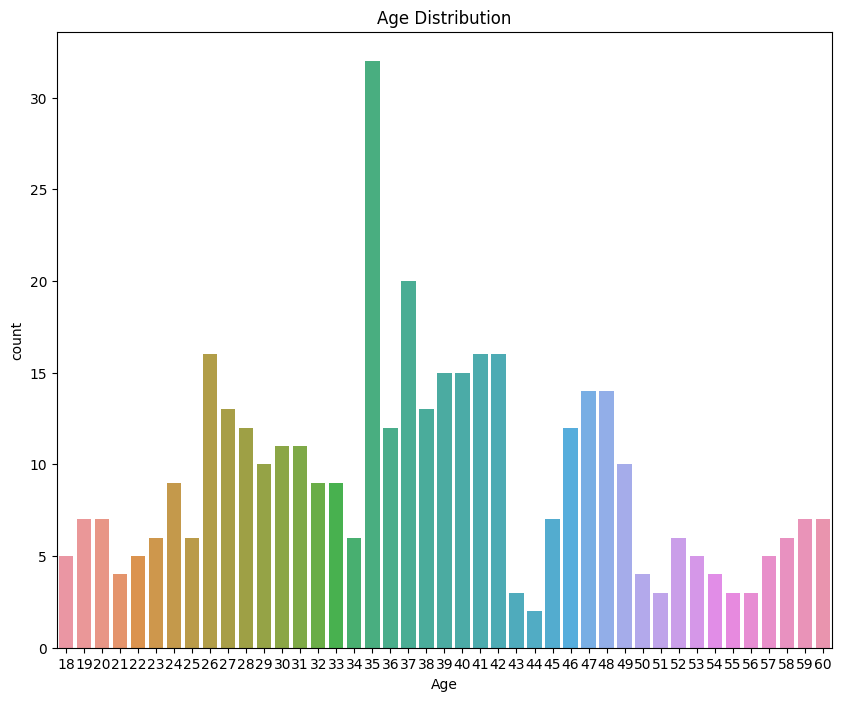

In [12]:
plt.figure(figsize=(10,8))
sns.countplot(x='Age',data=data)
plt.title('Age Distribution')
plt.show()

In [13]:
# Calculate descriptive statistics
overall_distribution = "The overall distribution of ages appears..."
central_tendency_mean = data['Age'].mean()
central_tendency_median = data['Age'].median()
central_tendency_mode = data['Age'].mode()[0]  # In case there are multiple modes
variability_range = data['Age'].max() - data['Age'].min()
variability_std_dev = data['Age'].std()

# Print the descriptive statistics
print("Overall Distribution:", overall_distribution)
print("Mean:", central_tendency_mean)
print("Median:", central_tendency_median)
print("Mode:", central_tendency_mode)
print("Range:", variability_range)
print("Standard Deviation:", variability_std_dev)

Overall Distribution: The overall distribution of ages appears...
Mean: 37.655
Median: 37.0
Mode: 35
Range: 42
Standard Deviation: 10.482876597307914


* Overall Distribution: The age distribution appears to be somewhat symmetrical, with a peak around the mid to late 30s. While there is variation across different ages, there isn't a pronounced skewness to the distribution.
* Median (Middle Age): The middle value, or median, of the age distribution is 37 years old. This means that half of the individuals in the dataset are younger than 37, and half are older.
* Mode (Most Frequent Age): The most common age in the dataset, or mode, is 35 years old. This suggests that there is a relatively high frequency of individuals around this age.
* Range (Age Span): The range of ages in the dataset spans 42 years, from the youngest to the oldest individual. This indicates the extent of variability in age within the dataset.
* Standard Deviation (Variability): The standard deviation of approximately 10.5 indicates the average amount of deviation or spread of ages from the mean. In other words, ages tend to vary around the mean by about 10.5 years.

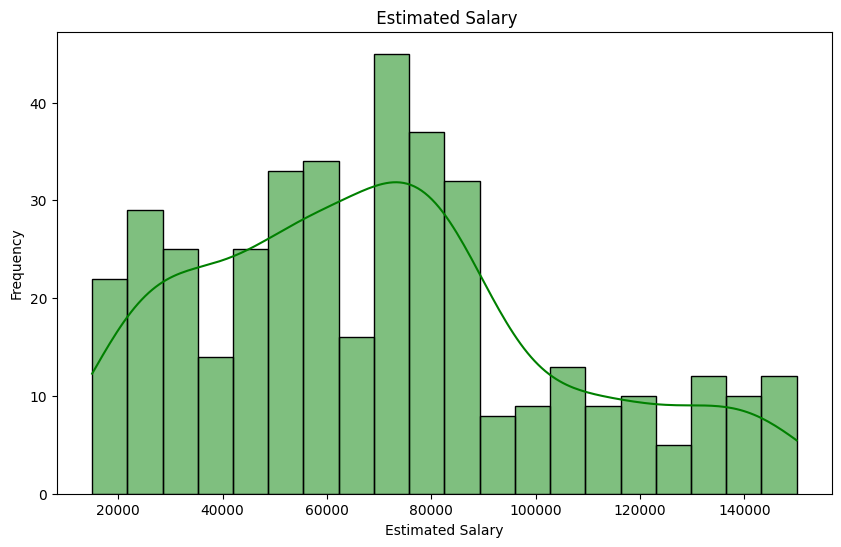

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data['EstimatedSalary'], bins=20, kde=True, color='green')
plt.title(' Estimated Salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.show()

In [15]:
# Calculate summary statistics
mean_salary = data['EstimatedSalary'].mean()
median_salary = data['EstimatedSalary'].median()
mode_salary = data['EstimatedSalary'].mode()[0]
std_dev_salary = data['EstimatedSalary'].std()

# Print summary statistics
print("Mean Estimated Salary:", mean_salary)
print("Median Estimated Salary:", median_salary)
print("Mode Estimated Salary:", mode_salary)
print("Standard Deviation of Estimated Salary:", std_dev_salary)

# Describe insights
print("The estimated salary distribution appears to be...")
print("There is variability in estimated salaries, with a standard deviation of", std_dev_salary)
print("The most common estimated salary is around", mode_salary)

Mean Estimated Salary: 69742.5
Median Estimated Salary: 70000.0
Mode Estimated Salary: 72000
Standard Deviation of Estimated Salary: 34096.960282424785
The estimated salary distribution appears to be...
There is variability in estimated salaries, with a standard deviation of 34096.960282424785
The most common estimated salary is around 72000


## Based on these statistics:

* Variability: There is notable variability in estimated salaries, as evidenced by the relatively large standard deviation. This indicates that estimated salaries range widely across the dataset.
* Central Tendency: Although the mean and median estimated salaries are close, indicating a relatively symmetric distribution, the mode being slightly higher suggests a slight skewness towards higher estimated salaries.
* Most Common Salary: The most common estimated salary, as indicated by the mode, is around $72,000. This suggests that a significant proportion of individuals in the dataset have estimated salaries close to this value

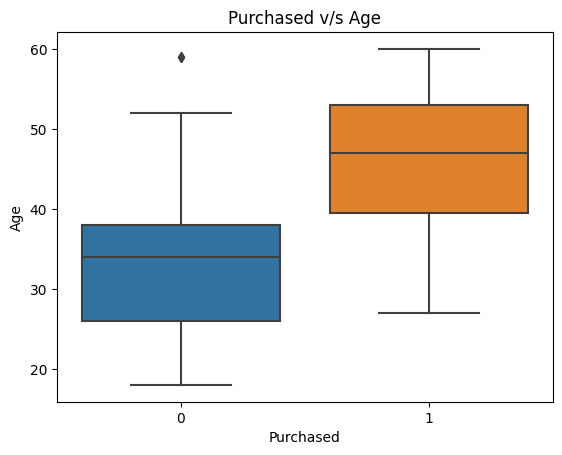

In [16]:
sns.boxplot(x='Purchased',y='Age',data=data)
plt.title('Purchased v/s Age')
plt.show()

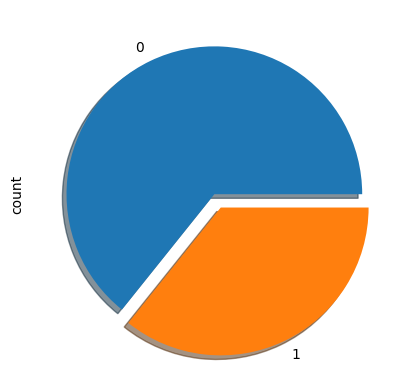

In [17]:
data['Purchased'].value_counts().plot(kind='pie',explode=(0,0.1),shadow=True)
plt.show()

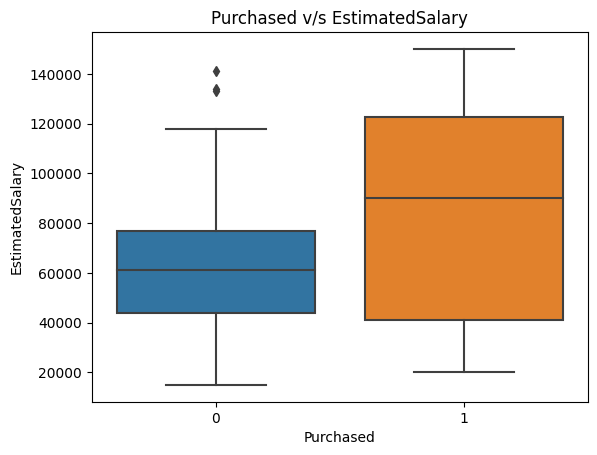

In [19]:
sns.boxplot(x='Purchased',y='EstimatedSalary',data=data)
plt.title('Purchased v/s EstimatedSalary')
plt.show()

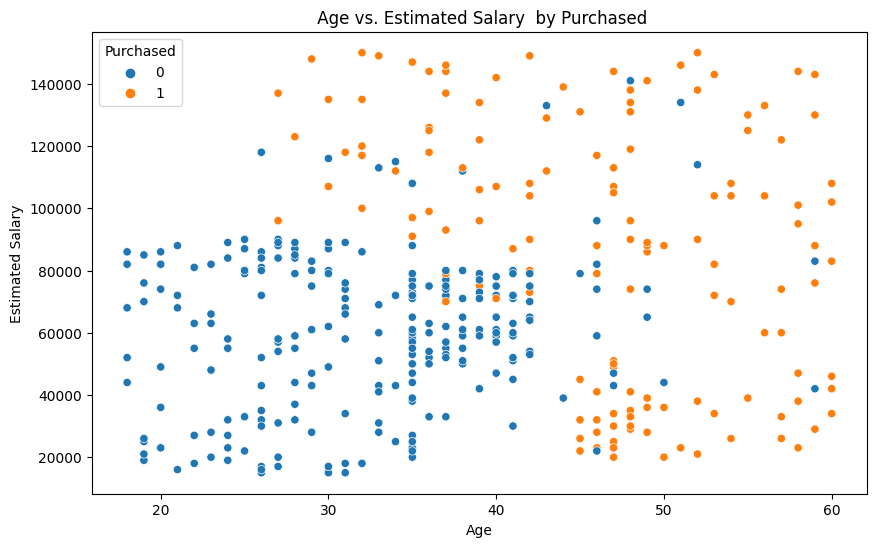

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=data, )
plt.title(' Age vs. Estimated Salary  by Purchased')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()

# Model

In [20]:
data

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [22]:
x=data.drop(columns='Purchased',axis=1)

In [23]:
y=data['Purchased']

In [24]:
x

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [25]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import cross_val_score

In [29]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [56]:
# Creating the RandomForestClassifier model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [40]:
# Training the model
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [41]:
# Making predictions on the test data
y_pred = rf_classifier.predict(X_test)

In [42]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9


In [46]:
report=classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.88      0.92        52
           1       0.81      0.93      0.87        28

    accuracy                           0.90        80
   macro avg       0.89      0.91      0.89        80
weighted avg       0.91      0.90      0.90        80



In [57]:
# Performing 5-fold cross-validation
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)
print("Mean Cross-validation score:", mean_cv_score)
print("Standard Deviation of Cross-validation scores:", std_cv_score)


Cross-validation scores: [0.90625  0.953125 0.875    0.84375  0.875   ]
Mean Cross-validation score: 0.890625
Standard Deviation of Cross-validation scores: 0.0369754986443726


# Best accuracy

In [61]:
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Instantiate the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train,y_train)

# Get the best parameters and best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Accuracy: 0.90625
